# 1.Color Selection

# 2.Region Masking

# 3.Color and Region Combined

# 4.Canny Edge Detection

# 5.Hough Transform to Find Lane Lines


### 1.Color Selection

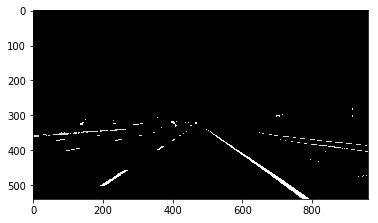

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


%matplotlib inline

# Read in the image
image = mpimg.imread('test.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)

# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200
######

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Do a boolean or with the "|" character to identify
# pixels below the thresholds
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
# print(thresholds)
color_select[thresholds] = [0,0,0]

# Display the image                 
plt.imshow(color_select)

# Uncomment the following code if you are running the code locally and wish to save the image
# mpimg.imsave("test-after.png", color_select)


### 2.Region Masking


This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


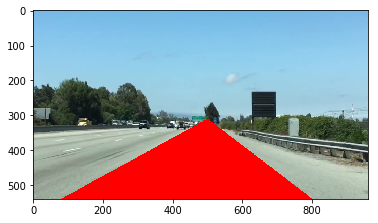

In [3]:
# Read in the image and print some stats
image = mpimg.imread('test.jpg')
print('This image is: ', type(image), 
         'with dimensions:', image.shape)

# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [80, 539]
right_bottom = [800, 539]
apex = [500, 310]

# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

# Display the image
plt.imshow(region_select)


### 3.Color and Region Combined

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


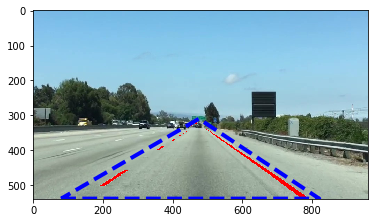

In [4]:
# Read in the image and print some stats
image = mpimg.imread('test.jpg')
print('This image is: ', type(image), 
         'with dimensions:', image.shape)

# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [80, 539]
right_bottom = [820, 539]
apex = [475, 310]

# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Mask color selection
color_select[color_thresholds] = [0,0,0]
# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [255,0,0]

# # Display our two output images
# plt.imshow(color_select)
# plt.imshow(line_image)

# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select)
plt.imshow(line_image)

## Finding Lines of Any Color
----

### 4.Canny Edge Detection


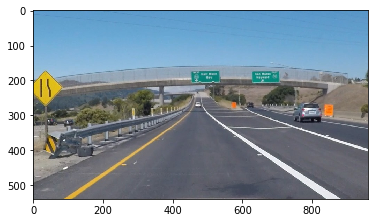

In [5]:
image = mpimg.imread('exit-ramp.jpg')
plt.imshow(image)


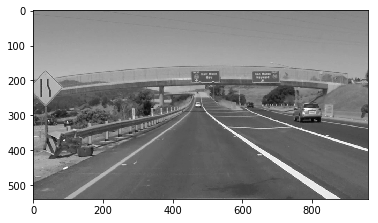

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #grayscale conversion
plt.imshow(gray, cmap='gray')

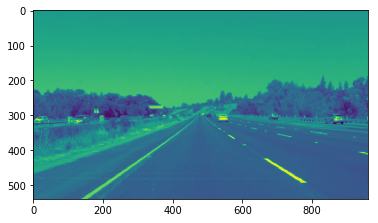

In [134]:
# Read in the image and convert to grayscale
# image = mpimg.imread('exit-ramp.jpg')
# image = mpimg.imread('solidWhiteCurve.jpg')
# image = mpimg.imread('solidWhiteRight.jpg')
# image = mpimg.imread('solidYellowCurve.jpg')
# image = mpimg.imread('solidYellowCurve2.jpg')
image = mpimg.imread('solidYellowLeft.jpg')
# image = mpimg.imread('whiteCarLaneSwitch.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

# plt.subplot(1,2,1)
plt.imshow(blur_gray)



In [135]:

# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
# low_threshold = 100
# high_threshold = 200
low_threshold = 100#50
high_threshold = 200#150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
# plt.subplot(1,2,2)
# plt.imshow(edges, cmap='Greys_r')

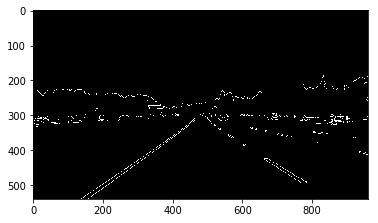

In [136]:
plt.imshow(edges, cmap='Greys_r')

### 5.Hough Transform to Find Lane Lines

[[[ 60 540]
  [430 320]
  [510 320]
  [900 540]]]


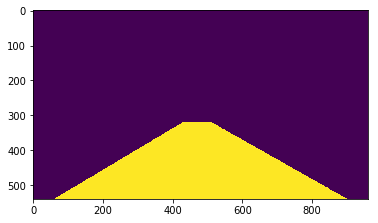

In [154]:
# Read in and grayscale the image
# image = mpimg.imread('exit-ramp.jpg')
# image = mpimg.imread('solidWhiteCurve.jpg')
image = mpimg.imread('solidWhiteRight.jpg')
# image = mpimg.imread('solidYellowCurve.jpg')
# image = mpimg.imread('solidYellowCurve2.jpg')
# image = mpimg.imread('solidYellowLeft.jpg')
# image = mpimg.imread('whiteCarLaneSwitch.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 13#5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 28#50
high_threshold = 115#150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
# vertices = np.array([[(0,imshape[0]),(0, 200), (imshape[1], 200), (imshape[1],imshape[0])]], dtype=np.int32)
#兴趣区域选择很重要
# vertices = np.array([[(0,imshape[0]),(430, 320), (510, 320), (imshape[1],imshape[0])]], dtype=np.int32)
vertices = np.array([[(60,imshape[0]),(430, 320), (510, 320), (imshape[1] - 60,imshape[0])]], dtype=np.int32)
#填充多边形
cv2.fillPoly(mask, vertices, ignore_mask_color)
interest_section = np.copy(mask)#感兴趣的区域

# 对图像（灰度图像或彩色图像均可）每个像素值进行二进制“与”操作
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
# rho = 1 # distance resolution in pixels of the Hough grid
rho = 1
theta = np.pi/180 # angular resolution in radians of the Hough grid
# threshold = 20     # minimum number of votes (intersections in Hough grid cell)
threshold = 15#15
# min_line_length = 10 #minimum number of pixels making up a line
min_line_length = 30#
max_line_gap = 20   # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
i=0
for line in lines:
    for x1,y1,x2,y2 in line:
        if i%3 == 0:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),3)
        if i%3 == 1:
            cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),3)
        if i%3 == 2:
            cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),3)
    i += 1

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
#图像叠加or图像混合加权
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
lines_edges2 = cv2.addWeighted(image, 0.8, line_image, 1, 0)
# plt.imshow(lines_edges)
# plt.imshow(line_image)
print(vertices)
plt.imshow(interest_section)

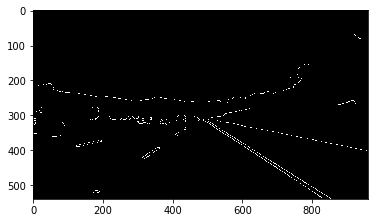

In [127]:
plt.imshow(color_edges)

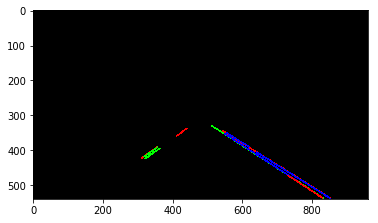

In [149]:
plt.imshow(line_image)

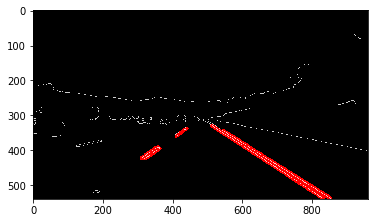

In [129]:
plt.imshow(lines_edges)

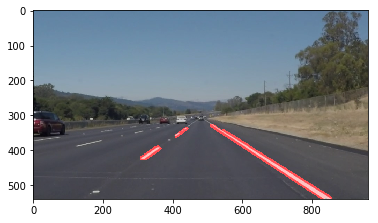

In [130]:
plt.imshow(lines_edges2)

### 7.